## heading

In [1]:
from Bio.SeqIO.FastaIO import SimpleFastaParser  # low level fast fasta parser
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [108]:
from statistics import mean, mode, median
import pandas as pd

In [2]:
%%bash
ls -lh ./data

total 11M
-rwxrwxrwx 1 root root 3.3M Nov 30 11:08 DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root 3.2M Nov 30 11:08 DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root 3.8M Nov 30 11:08 DK-AID_S133_L001_R1_001 assembled to HBV_0.fasta
-rwxrwxrwx 1 root root   83 Dec 12 11:49 test.txt


In [24]:
def get_ref_seq(in_file):
    
    with open(in_file) as in_handle:
        for title, seq in SimpleFastaParser(in_handle):
            ref_seq = seq
            break
            
    return ref_seq
    

In [26]:
def count_snp_in_reads(ref_seq, in_file):
    
    container = []
    
    with open(in_file) as in_handle:
        reads = SimpleFastaParser(in_handle)
            
        for record in reads:
            read = record[1]
            snp_counter = 0
            for ind in range(0, len(ref_seq)):
                if read[ind] != ref_seq[ind] and read[ind] != "-":
                    snp_counter += 1
                
            container.append(snp_counter)
    
    return container
                        
                    
        
        
        

In [83]:
ref_seq = get_ref_seq('./data/DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta')

In [70]:
ref_seq

'AT-G-G-C-T-G-CTA-G-G-CTGTGCTGCCAACTGG-ATCCTGCGC----GGGAC--GTCCTTTGTTT--------ACGTC---CCGTCGGCGCTGA-ATCCT-GC--GGAC-GACCC-TT--CT-CG----------GGG-TCGCTTGG--GACTCTCTCGTCCCCT------T-CTCCGT-C---TGC-CGTTCCG-A-CC--GAC--CAC-GGG-GC-GCACCTCTCTTTACG--CGGACTCC-CC-GTCTGTGCCTTCTCAT-CTGCC-G-G--A-CC--GTG---T--G-C-A--C--T'

In [84]:
snps_1 = count_snp_in_reads(ref_seq, './data/DK-A3B_S131_L001_R2_001 assembled to HBV_0.fasta')

In [31]:
snps

[0,
 2,
 16,
 5,
 16,
 4,
 1,
 2,
 5,
 1,
 4,
 2,
 0,
 7,
 3,
 16,
 2,
 8,
 4,
 38,
 1,
 4,
 10,
 4,
 12,
 9,
 23,
 0,
 18,
 8,
 30,
 2,
 2,
 7,
 13,
 10,
 2,
 2,
 2,
 1,
 2,
 6,
 1,
 0,
 1,
 1,
 1,
 21,
 9,
 53,
 6,
 9,
 4,
 2,
 1,
 2,
 1,
 7,
 4,
 5,
 6,
 8,
 2,
 17,
 2,
 2,
 1,
 5,
 3,
 15,
 1,
 1,
 2,
 8,
 2,
 13,
 0,
 2,
 2,
 1,
 16,
 2,
 0,
 23,
 4,
 1,
 4,
 3,
 22,
 4,
 7,
 9,
 1,
 3,
 5,
 12,
 4,
 5,
 4,
 2,
 0,
 3,
 6,
 4,
 3,
 2,
 14,
 1,
 8,
 10,
 4,
 1,
 4,
 13,
 4,
 5,
 10,
 5,
 0,
 26,
 5,
 2,
 2,
 17,
 5,
 7,
 18,
 5,
 6,
 48,
 10,
 8,
 1,
 6,
 21,
 3,
 9,
 4,
 3,
 8,
 2,
 18,
 13,
 2,
 16,
 2,
 7,
 8,
 27,
 35,
 8,
 49,
 12,
 7,
 33,
 11,
 3,
 2,
 3,
 4,
 4,
 16,
 2,
 4,
 6,
 12,
 1,
 5,
 7,
 2,
 2,
 3,
 3,
 11,
 8,
 17,
 7,
 3,
 4,
 0,
 1,
 6,
 2,
 2,
 7,
 3,
 3,
 10,
 1,
 9,
 1,
 1,
 6,
 9,
 4,
 4,
 2,
 5,
 3,
 3,
 0,
 0,
 9,
 27,
 8,
 26,
 5,
 4,
 2,
 13,
 43,
 23,
 2,
 7,
 9,
 5,
 2,
 11,
 11,
 10,
 3,
 12,
 1,
 8,
 1,
 2,
 16,
 5,
 6,
 21,
 7,
 6,
 27,
 24,
 10,
 3

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


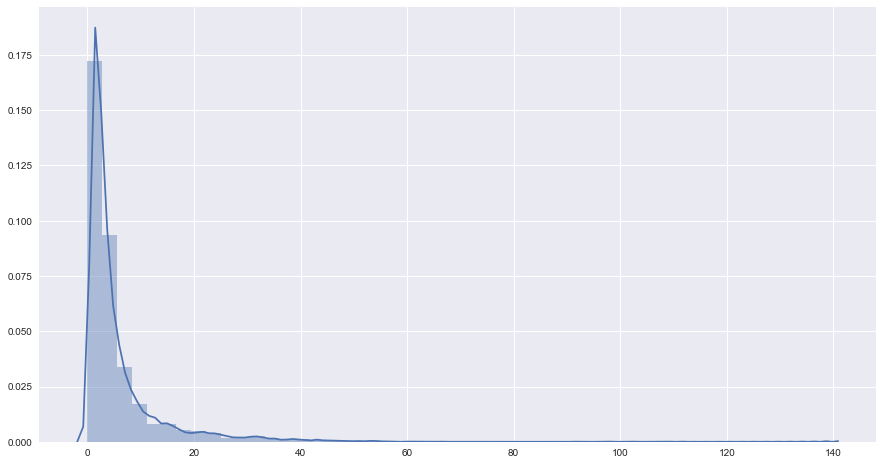

In [47]:
plt.figure(figsize=(15, 8))
sns.distplot(snps)

In [49]:
snps.sort(reverse=True)

In [50]:
print(snps_sorted)

None


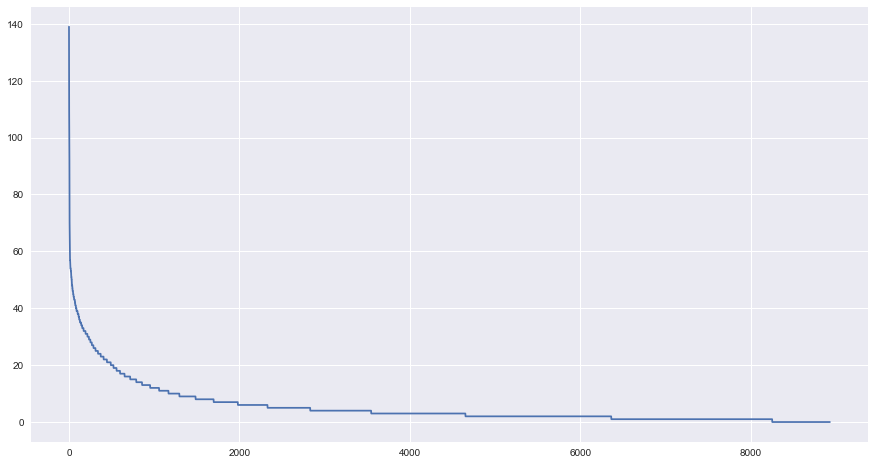

In [52]:
plt.figure(figsize=(15,8))
plt.plot(snps)

In [53]:
max(snps)

139

In [54]:
min(snps)

0

In [58]:
statistics.mean(snps)

5.395833333333333

In [59]:
statistics.mode(snps)

1

In [85]:
ref_seq = get_ref_seq('./data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta')

In [86]:
snps_2 = count_snp_in_reads(ref_seq, './data/DK-A3A_S130_L001_R1_001 assembled to HBV_0.fasta')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


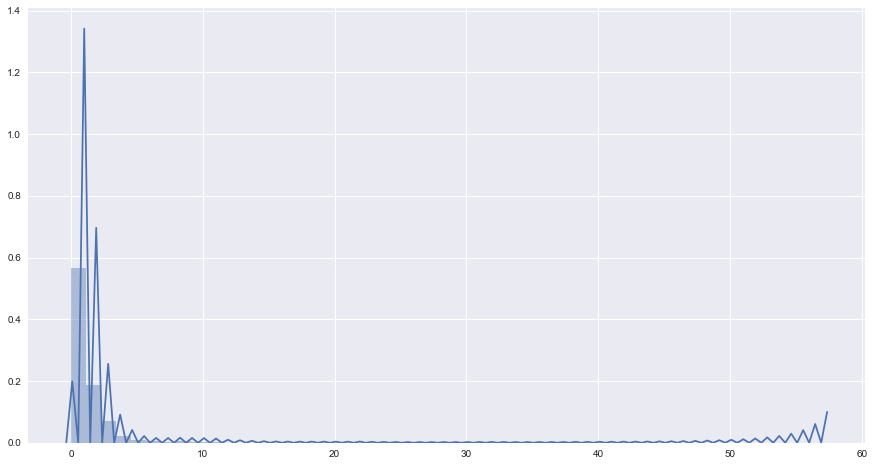

In [62]:
plt.figure(figsize=(15, 8))
sns.distplot(snps)

In [90]:
snps_1.sort(reverse=True)
snps_2.sort(reverse=True)

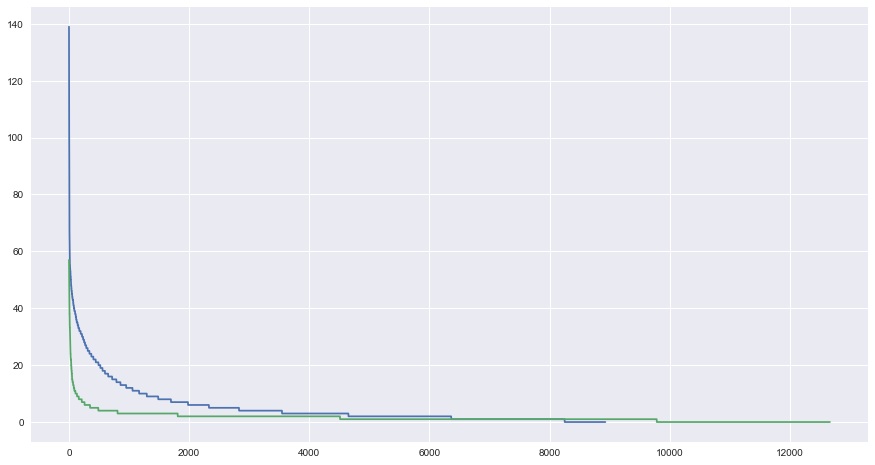

In [92]:
plt.figure(figsize=(15,8))
plt.plot(snps_1)
plt.plot(snps_2)

In [63]:
snps.sort()

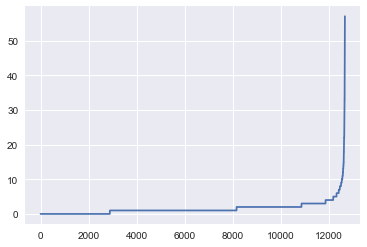

In [64]:
plt.plot(snps)

In [67]:
statistics.mean(snps)

1.5473709142586451

In [68]:
len(snps)

12666

In [74]:
from sklearn import preprocessing

In [75]:
snp1_scaled = preprocessing.scale(snps_1)

In [77]:
snp2_scaled = preprocessing.scale(snps_2)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


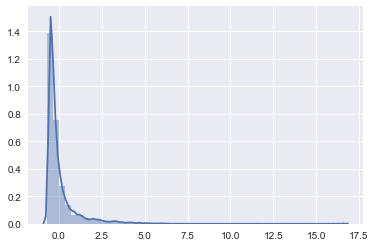

In [78]:
sns.distplot(snp1_scaled)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


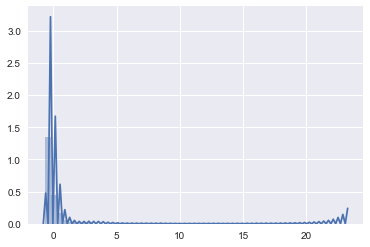

In [79]:
sns.distplot(snp2_scaled)

In [82]:
max(snps_1)

139

In [81]:
max(snps_2)

57

In [93]:
snp_collection = []
snp_collection.append(snps_1)
snp_collection.append(snps_2)

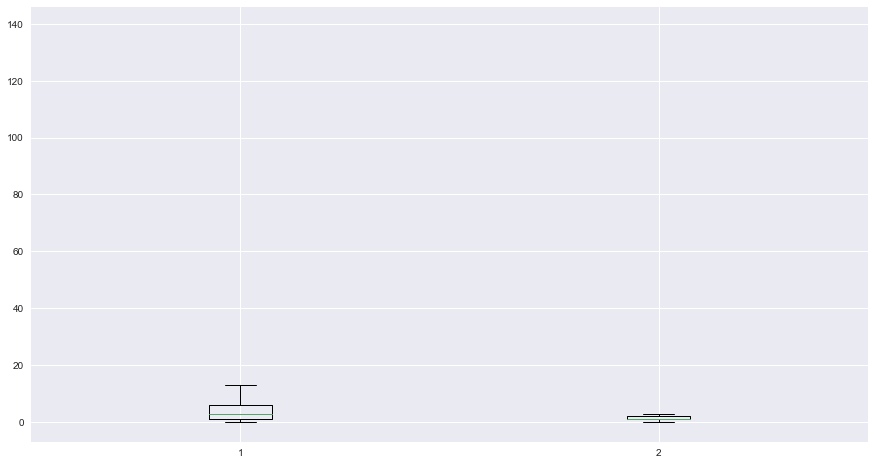

In [96]:
plt.figure(figsize=(15, 8))
plt.boxplot(snp_collection)
plt.show()

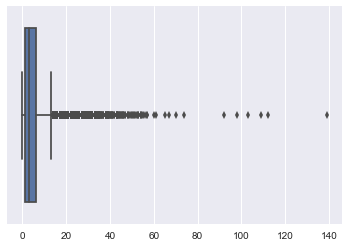

In [102]:
sns.boxplot(snps_1)

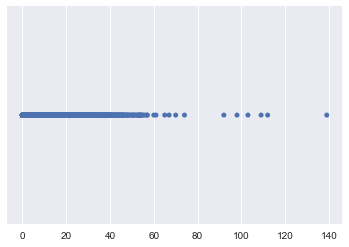

In [104]:
sns.stripplot(snps_1)

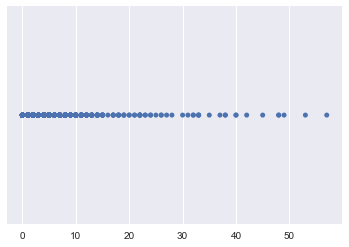

In [105]:
sns.stripplot(snps_2)

ValueError: setting an array element with a sequence.

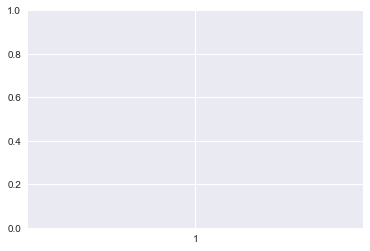

In [107]:
plt.scatter(['1', '2'], snp_collection)

In [109]:
df = pd.DataFrame(snp_collection)

In [111]:
df = df.T

In [114]:
df.head()


,0,1
0,139.0,57.0
1,112.0,53.0
2,109.0,49.0
3,103.0,48.0
4,98.0,48.0


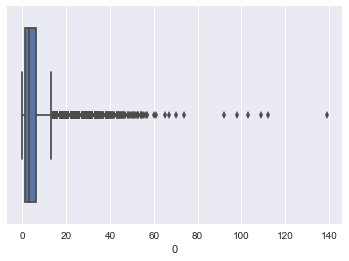

In [115]:
sns.boxplot(x=df[0])

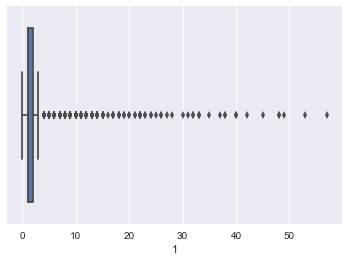

In [116]:
sns.boxplot(x=df[1])

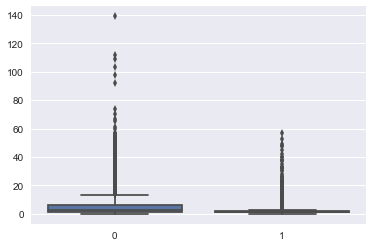

In [119]:
sns.boxplot(data=df.loc[:,:])

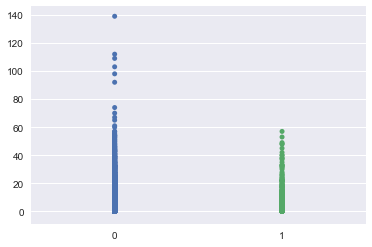

In [120]:
sns.stripplot(data=df.loc[:,:])